# Calculations

In [1]:
import pandas as pd
from pandas_datareader import data as web
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from scipy import stats

from xgboost import XGBRegressor


In [ ]:
for i in range(len(tickers)):
    print(tickers[i][0], tickers[i][1])
    

In [12]:
start_date = datetime(2011, 1, 1)
end_date = datetime(2021, 3, 17)
interval = 'd'
ticker = 'AAPL'
df = web.get_data_yahoo(ticker, start=start_date, end=end_date, interval=interval).reset_index()
df.columns = df.columns.str.lower()


In [11]:
df.head()

,date,high,low,open,close,volume,adj close
0,2011-01-03,11.795000,11.601429,11.630000,11.770357,445138400.0,10.138556
1,2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.191467
2,2011-01-05,11.940714,11.767857,11.769643,11.928571,255519600.0,10.274836
3,2011-01-06,11.973214,11.889286,11.954286,11.918929,300428800.0,10.266529
4,2011-01-07,12.012500,11.853571,11.928214,12.004286,311931200.0,10.340052


In [2]:
tickers = [
    ['PLZL.ME', 'Polyus'],
    ['DPM.TO', 'Dundee Precious Metals Inc.'], 
    ['RMS.AX', 'Ramelius Resources Limited'], 
    ['CG.TO', 'Centerra Gold Inc.'], 
    ['2899.HK', 'Zijin Mining Group Company Limited'], 
    ['BTG', 'B2Gold Corp.'], 
    ['EGO', 'Eldorado Gold Corporation'], 
    ['GOR.AX', 'Gold Road Resources Limited'], 
    ['NCM.AX', 'Newcrest Mining Limited'], 
    ['WDO.TO', 'Wesdome Gold Mines Ltd.'], 
    ['POLY.L', 'Polymetal International plc'],
    ['EQX.TO', 'Equinox Gold Corp.'], 
    ['CEY.L', 'Centamin plc'], 
    ['PVG', 'Pretium Resources Inc.'], 
    ['SBM.AX', 'St Barbara Limited'], 
    ['BVN', 'Compañía de Minas Buenaventura S.A.A.'], 
    ['PRU.AX', 'Perseus Mining Limited'], 
    ['NST.AX', 'Northern Star Resources Limited'], 
    ['EDV.TO', 'Endeavour Mining Corporation'], 
    ['LUN.TO', 'Lundin Mining Corporation'], 
    ['RRL.AX', 'Regis Resources Limited'], 
    ['POG.L', 'Petropavlovsk PLC'], 
    ['KGC', 'Kinross Gold Corporation'], 
    ['GFI', 'Gold Fields Limited'], 
    ['TGZ.TO', 'Teranga Gold Corporation'], 
    ['CDE', 'Coeur Mining, Inc.'],
    ['TXG.TO', 'Torex Gold Resources Inc.'], 
    ['DRD', 'DRDGOLD Limited'], 
    ['NG', 'NovaGold Resources Inc. '], 
    ['AU', 'AngloGold Ashanti Limited'], 
    ['GOLD', 'Barrick Gold Corporation'], 
    ['EVN.AX', 'Evolution Mining Limited'], 
    ['NEM', 'Newmont Corporation'], 
    ['SAR.AX', 'Saracen Mineral Holdings Limited'], 
    ['AUY', 'Yamana Gold Inc.'], 
    ['AEM', 'Agnico Eagle Mines Limited'], 
    ['WPM', 'Wheaton Precious Metals Corp.'], 
    ['IAG', 'IAMGOLD Corporation'], 
    ['SSRM', 'SSR Mining Inc.'], 
    ['OGC.TO', 'OceanaGold Corporation'], 
    ['AGI', 'Alamos Gold Inc.'], 
    ['NGD', 'New Gold Inc.'], 
    ['HMY', 'Harmony Gold Mining Company Limited'], 
    ['SAND', 'Sandstorm Gold Ltd.'], 
    ['SBSW', 'Sibanye Stillwater Limited'], 
    ['FNV', 'Franco-Nevada Corporation'], 
    ['RGLD', 'Royal Gold, Inc.'], 
    ['OR', 'Osisko Gold Royalties Ltd'], 
    ['SA', 'Seabridge Gold Inc.'],
    ['ANTM.JK', 'PT Aneka Tambang Tbk']
]

In [6]:
for i in range(len(tickers)):
    print(tickers[i][0], ' ====== ', tickers[i][1])

PLZL.ME  ======  Polyus
DPM.TO  ======  Dundee Precious Metals Inc.
RMS.AX  ======  Ramelius Resources Limited
CG.TO  ======  Centerra Gold Inc.
2899.HK  ======  Zijin Mining Group Company Limited
BTG  ======  B2Gold Corp.
EGO  ======  Eldorado Gold Corporation
GOR.AX  ======  Gold Road Resources Limited
NCM.AX  ======  Newcrest Mining Limited
WDO.TO  ======  Wesdome Gold Mines Ltd.
POLY.L  ======  Polymetal International plc
EQX.TO  ======  Equinox Gold Corp.
CEY.L  ======  Centamin plc
PVG  ======  Pretium Resources Inc.
SBM.AX  ======  St Barbara Limited
BVN  ======  Compañía de Minas Buenaventura S.A.A.
PRU.AX  ======  Perseus Mining Limited
NST.AX  ======  Northern Star Resources Limited
EDV.TO  ======  Endeavour Mining Corporation
LUN.TO  ======  Lundin Mining Corporation
RRL.AX  ======  Regis Resources Limited
POG.L  ======  Petropavlovsk PLC
KGC  ======  Kinross Gold Corporation
GFI  ======  Gold Fields Limited
TGZ.TO  ======  Teranga Gold Corporation
CDE  ======  Coeur Mining,

In [2]:
tickers = [
           'PLZL.ME', 'DPM.TO', 'RMS.AX', 'CG.TO', '2899.HK', 'BTG', 'EGO', 'GOR.AX', 'NCM.AX', 'WDO.TO', 'POLY.L', 
           'EQX.TO', 'CEY.L', 'PVG', 'SBM.AX', 'BVN', 'PRU.AX', 'NST.AX', 'EDV.TO', 'LUN.TO', 'RRL.AX', 'POG.L', 'KGC', 'GFI', 'TGZ.TO', 'CDE', 
           'TXG.TO', 'DRD', 'NG', 'AU', 'GOLD', 'EVN.AX', 'NEM', 'SAR.AX', 'AUY', 'AEM', 'WPM', 'IAG', 'SSRM', 'OGC.TO', 'AGI', 'NGD', 'HMY', 'SAND', 'SBSW', 'FNV', 'RGLD', 'OR', 'SA', 'ANTM.JK'
           ]
#tickers = ['NEM']

tickers = [
'HON', 'MMM', 'GE', 'ITW', 'ABB','EMR', 'ETN', 'ROP', 'TT', 'CMI', 'PH', 'ROK', 'AME',
'OTIS', 'GNRC', 'IR', 'XYL', 'DOV', 'IEX', 'HWM', 'GGG', 'LII', 'NDSN', 'BLDP', 'AOS',
'PNR', 'DCI', 'MIDD', 'ITT', 'GTLS', 'RBC', 'FLS', 'RXN', 'CR', 'CW', 'CFX', 'GTES', 'WTS', 'KRNT',
'JBT', 'PSN', 'AIMC', 'FELE', 'HI', 'ATKR', 'TPIC', 'B', 'SPXC', 'FLOW', 'WBT', 'MWA', 'CSWI', 'HLIO',
'KAI', 'NPO', 'HSC', 'OFLX', 'TRS', 'TNC', 'RAVN', 'EPAC', 'SXI', 'XONE', 'GRC', 'AMSC', 'CYD','CIR',
'LDL','THR','LXFR'
]

tickers = [
           'PLZL.ME', 'DPM.TO', 'RMS.AX', 'CG.TO', '2899.HK', 'BTG', 'EGO', 'GOR.AX', 'NCM.AX', 'WDO.TO', 'POLY.L', 
           'EQX.TO', 'CEY.L', 'PVG', 'SBM.AX', 'BVN', 'PRU.AX', 'NST.AX', 'EDV.TO', 'LUN.TO', 'RRL.AX', 'POG.L', 'KGC', 'GFI', 'TGZ.TO', 'CDE', 
           'TXG.TO', 'DRD', 'NG', 'AU', 'GOLD', 'EVN.AX', 'NEM', 'SAR.AX', 'AUY', 'AEM', 'WPM', 'IAG', 'SSRM', 'OGC.TO', 'AGI', 'NGD', 'HMY', 'SAND', 'SBSW', 'FNV', 'RGLD', 'OR', 'SA', 'ANTM.JK'
           ]

#benchmark = 'DX=F' #(Dollar index)
benchmark = 'GC=F' #(Index SP500)
industry_mark = 'GDX'
ATR_PERIOD = 12
start_date = datetime(2020, 2, 2)
end_date = datetime(2021, 3, 30)

#comp_list = pd.read_excel('Real_Estate_list.xlsx')
#tickers = comp_list['Ticker'].tolist()


# Building the dataset

In [32]:
#Build the main dataset with no ML

for ticker in tickers:

    try:

        df = pd.DataFrame()

        df['open1'] = web.get_data_yahoo(ticker, start=start_date, end=end_date, interval='d')['Open']
        df['high1'] = web.get_data_yahoo(ticker, start=start_date, end=end_date, interval='d')['High']
        df['low1'] = web.get_data_yahoo(ticker, start=start_date, end=end_date, interval='d')['Low']
        df['close1'] = web.get_data_yahoo(ticker, start=start_date, end=end_date, interval='d')['Close']
        df['volume1'] = web.get_data_yahoo(ticker, start=start_date, end=end_date, interval='d')['Volume']

        df['open2'] = web.get_data_yahoo(benchmark, start=start_date, end=end_date, interval='d')['Open']
        df['high2'] = web.get_data_yahoo(benchmark, start=start_date, end=end_date, interval='d')['High']
        df['low2'] = web.get_data_yahoo(benchmark, start=start_date, end=end_date, interval='d')['Low']
        df['close2'] = web.get_data_yahoo(benchmark, start=start_date, end=end_date, interval='d')['Close']
        df['volume2'] = web.get_data_yahoo(benchmark, start=start_date, end=end_date, interval='d')['Volume']

        df['open3'] = web.get_data_yahoo(industry_mark, start=start_date, end=end_date, interval='d')['Open']
        df['high3'] = web.get_data_yahoo(industry_mark, start=start_date, end=end_date, interval='d')['High']
        df['low3'] = web.get_data_yahoo(industry_mark, start=start_date, end=end_date, interval='d')['Low']
        df['close3'] = web.get_data_yahoo(industry_mark, start=start_date, end=end_date, interval='d')['Close']
        df['volume3'] = web.get_data_yahoo(industry_mark, start=start_date, end=end_date, interval='d')['Volume']

        df['Ticker'] = ticker
        #df['day_of_week'] = df['Date'].dt.dayofweek

        df.reset_index(inplace=True)

        df = df.rename({'index':'Date'}, axis='columns')

        #===== Calculate ATR for stock

        for i in range(1, len(df)):
            d1 = df.loc[i, 'high1'] - df.loc[i, 'low1']
            d2 = abs(df.loc[i, 'high1'] - df.loc[i-1, 'close1'])
            d3 = abs(df.loc[i, 'low1'] - df.loc[i-1, 'close1'])
            df.loc[i, 'TR1'] = max(d1, d2, d3).round(2)

        df['ATR1'] = df['TR1'].rolling(ATR_PERIOD).mean()
        df['ATR_P1'] = df['ATR1'] / df['close1'] 
        df['Diff1'] = df['close1'].pct_change()

        df['Diff2'] = df['close2'].pct_change()
        df['Diff3'] = df['close3'].pct_change()

        df['OBV1'] = np.where(df['close1'] > df['close1'].shift(1), df['volume1'], np.where(df['close1'] < df['close1'].shift(1), -df['volume1'], 0)).cumsum()
        df['OBV2'] = np.where(df['close2'] > df['close2'].shift(1), df['volume2'], np.where(df['close2'] < df['close2'].shift(1), -df['volume2'], 0)).cumsum()
        df['OBV3'] = np.where(df['close3'] > df['close3'].shift(1), df['volume3'], np.where(df['close3'] < df['close3'].shift(1), -df['volume3'], 0)).cumsum()

        df['Day_of_week'] = df['Date'].dt.dayofweek

        #===== Calculate dynamic Beta

        WINDOW_SIZE = 5

        for i in range(WINDOW_SIZE, len(df)):
 
            df1 = df.loc[i-WINDOW_SIZE:i, ['Diff1']]
            df2 = df.loc[i-WINDOW_SIZE:i, ['Diff2']]

            X = df2['Diff2'] #Gold
            y = df1['Diff1'] #Stock

            slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

            df.at[i, 'Beta_gold'] = slope

        for i in range(WINDOW_SIZE, len(df)):
 
            df1 = df.loc[i-WINDOW_SIZE:i, ['Diff1']]
            df2 = df.loc[i-WINDOW_SIZE:i, ['Diff3']]

            X = df2['Diff3'] #Gold
            y = df1['Diff1'] #Stock

            slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

            df.at[i, 'Beta_sector'] = slope

        print(ticker)
        df.to_excel(ticker + '_dataset_.xlsx', index=False)

    except:
        print('Cannot calculate for ticker: ', ticker)

PLZL.ME
DPM.TO
RMS.AX
CG.TO
2899.HK
BTG
EGO
GOR.AX
NCM.AX
WDO.TO
POLY.L
EQX.TO
CEY.L
PVG
SBM.AX
BVN
PRU.AX
NST.AX
EDV.TO
LUN.TO
RRL.AX
POG.L
KGC
GFI
TGZ.TO
CDE
TXG.TO
DRD
NG
AU
GOLD
EVN.AX
NEM
SAR.AX
AUY
AEM
WPM
IAG
SSRM
OGC.TO
AGI
NGD
HMY
SAND
SBSW
FNV
RGLD
OR
SA
ANTM.JK


In [3]:
#Build the main dataset with no ML and return dynamic beta
for ticker in tickers:

    try:

        df = pd.DataFrame()

        df['open1'] = web.get_data_yahoo(ticker, start=start_date, end=end_date, interval='d')['Open']
        df['high1'] = web.get_data_yahoo(ticker, start=start_date, end=end_date, interval='d')['High']
        df['low1'] = web.get_data_yahoo(ticker, start=start_date, end=end_date, interval='d')['Low']
        df['close1'] = web.get_data_yahoo(ticker, start=start_date, end=end_date, interval='d')['Close']
        df['volume1'] = web.get_data_yahoo(ticker, start=start_date, end=end_date, interval='d')['Volume']

        df['open2'] = web.get_data_yahoo(benchmark, start=start_date, end=end_date, interval='d')['Open']
        df['high2'] = web.get_data_yahoo(benchmark, start=start_date, end=end_date, interval='d')['High']
        df['low2'] = web.get_data_yahoo(benchmark, start=start_date, end=end_date, interval='d')['Low']
        df['close2'] = web.get_data_yahoo(benchmark, start=start_date, end=end_date, interval='d')['Close']
        df['volume2'] = web.get_data_yahoo(benchmark, start=start_date, end=end_date, interval='d')['Volume']

        df['open3'] = web.get_data_yahoo(industry_mark, start=start_date, end=end_date, interval='d')['Open']
        df['high3'] = web.get_data_yahoo(industry_mark, start=start_date, end=end_date, interval='d')['High']
        df['low3'] = web.get_data_yahoo(industry_mark, start=start_date, end=end_date, interval='d')['Low']
        df['close3'] = web.get_data_yahoo(industry_mark, start=start_date, end=end_date, interval='d')['Close']
        df['volume3'] = web.get_data_yahoo(industry_mark, start=start_date, end=end_date, interval='d')['Volume']

        df['Ticker'] = ticker
        #df['day_of_week'] = df['Date'].dt.dayofweek

        df.reset_index(inplace=True)

        df = df.rename({'index':'Date'}, axis='columns')

        #===== Calculate ATR for stock

        for i in range(1, len(df)):
            d1 = df.loc[i, 'high1'] - df.loc[i, 'low1']
            d2 = abs(df.loc[i, 'high1'] - df.loc[i-1, 'close1'])
            d3 = abs(df.loc[i, 'low1'] - df.loc[i-1, 'close1'])
            df.loc[i, 'TR1'] = max(d1, d2, d3).round(2)

        df['ATR1'] = df['TR1'].rolling(ATR_PERIOD).mean()
        df['ATR_P1'] = df['ATR1'] / df['close1'] 
        df['Diff1'] = df['close1'].pct_change()

        df['Diff2'] = df['close2'].pct_change()
        df['Diff3'] = df['close3'].pct_change()

        df['OBV1'] = np.where(df['close1'] > df['close1'].shift(1), df['volume1'], np.where(df['close1'] < df['close1'].shift(1), -df['volume1'], 0)).cumsum()
        df['OBV2'] = np.where(df['close2'] > df['close2'].shift(1), df['volume2'], np.where(df['close2'] < df['close2'].shift(1), -df['volume2'], 0)).cumsum()
        df['OBV3'] = np.where(df['close3'] > df['close3'].shift(1), df['volume3'], np.where(df['close3'] < df['close3'].shift(1), -df['volume3'], 0)).cumsum()

        df['Day_of_week'] = df['Date'].dt.dayofweek

        # calculate daily logarithmic return
        df['Return'] = (np.log(df['close1'] / df['close1'].shift(-1)))
      
        # calculate daily standard deviation of returns
        daily_std = np.std(df['Return'])
  
        # annualized daily standard deviation
        std = daily_std * 252 ** 0.5

        #===== Calculate dynamic Beta

        WINDOW_SIZE = 5

        for i in range(WINDOW_SIZE, len(df)):
 
            df1 = df.loc[i-WINDOW_SIZE:i, ['Diff1']]
            df2 = df.loc[i-WINDOW_SIZE:i, ['Diff2']]

            X = df2['Diff2'] #Benchmark (Gold)
            y = df1['Diff1'] #Stock

            slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

            df.at[i, 'Beta'] = slope

        for i in range(WINDOW_SIZE, len(df)):
 
            df1 = df.loc[i-WINDOW_SIZE:i, ['Diff1']]
            df2 = df.loc[i-WINDOW_SIZE:i, ['Diff3']]

            X = df2['Diff3'] #Gold
            y = df1['Diff1'] #Stock

            slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

            df.at[i, 'Beta_sector'] = slope

        #print(ticker)
        #df.to_excel(ticker + '_dataset_.xlsx', index=False)
        #print(ticker, '___', df['ATR_P1'].median(), '=====', df['Beta'].median(), '#######', df['Beta_sector'].median())
        print(ticker, '=======', std, ' ======= ', df['Beta'].median())

    except:
        print('Cannot calculate for ticker: ', ticker)

PLZL.ME ======= 0.3954234863313057  =======  0.7802931223258899
DPM.TO ======= 0.6237019019105301  =======  1.6143119447895142
RMS.AX ======= 0.6863804728850189  =======  0.773065406826903
CG.TO ======= 0.6263559507229889  =======  1.6130129577516168
2899.HK ======= 0.6427067594141348  =======  0.20547406268086238
BTG ======= 0.6585434550320238  =======  1.876488439492047
EGO ======= 0.7428623517787181  =======  1.9622047733805403
GOR.AX ======= 0.6302317009362777  =======  0.748816793913944
NCM.AX ======= 0.4345126047625481  =======  0.54383721212026
WDO.TO ======= 0.6059453051886952  =======  1.6939105117235156
POLY.L ======= 0.44865384925163887  =======  1.1066259375489533
EQX.TO ======= 0.5589725747355788  =======  1.513927705659292
CEY.L ======= 0.6281433418471835  =======  1.4871370171007579
PVG ======= 0.6786562170236232  =======  1.7358386602051499
SBM.AX ======= 0.5448756438293474  =======  0.5155671690010656
BVN ======= 0.6938066241258297  =======  1.2335755875002148
PRU.AX =

#Train the model

In [33]:
#Build model (baseline)

for ticker in tickers:

    try:

        df = pd.read_excel(ticker+'_dataset_.xlsx')

        #data = df.iloc[ATR_PERIOD:, :]
        data = df.copy()

        #n_train = data.loc[data['Date'] <= training_start_date].index[-1:][0]

        features = [
          #'Date',
          #'open1',    #it's a target
          'high1',
          'low1',
          'close1',
          'volume1',
          'open2',
          'high2',
          'low2',
          'close2',
          'volume2',
          'open3',
          'high3',
          'low3',
          'close3',
          'volume3',
          #'Ticker',
          'TR1',
          'ATR1',
          'ATR_P1',
          'Diff1',
          'Diff2',
          'Diff3',
          'OBV1',
          'OBV2',
          'OBV3',
          'Day_of_week',
          'Beta_gold',
          'Beta_sector'
        ]

        TEST_WINDOW = 30
        TEST_LENGTH = 1
        #n_train = TEST_WINDOW

        target = ['open1']
        new_data = pd.DataFrame()

        for i in range(TEST_WINDOW, len(data)):
            
            X_train = data.loc[i-TEST_WINDOW:i, features][:-TEST_LENGTH]
            X_test =  data.loc[i-TEST_WINDOW:i, features][-TEST_LENGTH:]
            
            y_train = data.loc[i-TEST_WINDOW:i, target][:-TEST_LENGTH]
            y_test =  data.loc[i-TEST_WINDOW:i, target][-TEST_LENGTH:]

            model = XGBRegressor(objective='reg:squarederror')
            model.fit(X_train, y_train)

            y_pred = model.predict(X_test)

            new_data.loc[i, ['Date']] = data.loc[i, ['Date']].values[0]
            new_data.loc[i, ['Price']] = y_test.values[0][0]
            new_data.loc[i, ['Pred']] = round(y_pred[0], 2)

            PERIOD_MEAN = 21
            new_data['Main'] = new_data['Pred'].rolling(PERIOD_MEAN).mean()
            new_data['St'] = new_data['Pred'].rolling(12).std()

            new_data['Up'] = new_data['Main']+2.2*new_data['St']
            new_data['Dn'] = new_data['Main']-2.2*new_data['St']

            new_data['B_cond'] = np.where(new_data['Price']>new_data['Dn'], 1, 0)
            new_data['S_cond'] = np.where(new_data['Price']<new_data['Up'], 1, 0)

            plot_data = new_data.copy()[PERIOD_MEAN:]
            plot_data = plot_data.reset_index()

            plot_data.to_excel(ticker+ '_pred.xlsx', index=False)
            

        print(ticker)

    except:
        print('Cannot calculate for ticker: ', ticker)


PLZL.ME
DPM.TO
RMS.AX
CG.TO
2899.HK
BTG
EGO
GOR.AX
NCM.AX
WDO.TO
POLY.L
EQX.TO
CEY.L
PVG
SBM.AX
BVN
PRU.AX
NST.AX
EDV.TO
LUN.TO
RRL.AX
POG.L
KGC
GFI
TGZ.TO
CDE
TXG.TO
DRD
NG
AU
GOLD
EVN.AX
NEM
SAR.AX
AUY
AEM
WPM
IAG
SSRM
OGC.TO
AGI
NGD
HMY
SAND
SBSW
FNV
RGLD
OR
SA
ANTM.JK


In [34]:
#==========================================
#Read the prediction and geneate a signals
%time

new_data = pd.DataFrame() #Here we collect all signals

for ticker in tickers:

    try:

        df = pd.read_excel(ticker+ '_pred.xlsx')

        df['Ticker'] = ticker
        df['BS'] = 0
        for i in range(3, len(df)):
            if (df['B_cond'][i] == 1):
                if (df['B_cond'][i-1] == 1):
                    if (df['B_cond'][i-2] == 0):
                        if (df['B_cond'][i-3] == 0):
                           df['BS'][i] = 1
                           #print(df['Date'][i])

        df['SS'] = 0
        for i in range(3, len(df)):
            if (df['S_cond'][i] == 1):
                if (df['S_cond'][i-1] == 1):
                    if (df['S_cond'][i-2] == 0):
                        if (df['S_cond'][i-3] == 0):
                           df['SS'][i] = 1
                           #print(df['Date'][i])
        
        df_buy = df.loc[df['BS']==1]
        df_sell = df.loc[df['SS']==1]

        df_signal = pd.concat([df_buy, df_sell], ignore_index=True)
        new_data = pd.concat([new_data, df_signal], ignore_index=True)
            

        print(ticker)

    except:
        print('Cannot calculate for ticker: ', ticker)

new_data = new_data.sort_values(by=['Date'])
new_data.to_excel('All_signals.xlsx', index=False)

Wall time: 0 ns
PLZL.ME
DPM.TO
RMS.AX
CG.TO


<ipython-input-34-801374ef1771>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BS'][i] = 1
<ipython-input-34-801374ef1771>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SS'][i] = 1
<ipython-input-34-801374ef1771>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BS'][i] = 1
<ipython-input-34-801374ef1771>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

2899.HK
BTG
EGO
GOR.AX
NCM.AX
WDO.TO

<ipython-input-34-801374ef1771>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BS'][i] = 1
<ipython-input-34-801374ef1771>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SS'][i] = 1
<ipython-input-34-801374ef1771>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BS'][i] = 1
<ipython-input-34-801374ef1771>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i


POLY.L
EQX.TO
CEY.L


<ipython-input-34-801374ef1771>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BS'][i] = 1
<ipython-input-34-801374ef1771>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SS'][i] = 1
<ipython-input-34-801374ef1771>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BS'][i] = 1
<ipython-input-34-801374ef1771>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

PVG
SBM.AX
BVN
PRU.AX
NST.AX

<ipython-input-34-801374ef1771>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BS'][i] = 1
<ipython-input-34-801374ef1771>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SS'][i] = 1
<ipython-input-34-801374ef1771>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BS'][i] = 1
<ipython-input-34-801374ef1771>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i


EDV.TO
LUN.TO
RRL.AX
POG.L


<ipython-input-34-801374ef1771>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BS'][i] = 1
<ipython-input-34-801374ef1771>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SS'][i] = 1
<ipython-input-34-801374ef1771>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BS'][i] = 1
<ipython-input-34-801374ef1771>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

KGC
GFI
TGZ.TO
CDE
TXG.TO


<ipython-input-34-801374ef1771>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BS'][i] = 1
<ipython-input-34-801374ef1771>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SS'][i] = 1
<ipython-input-34-801374ef1771>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BS'][i] = 1
<ipython-input-34-801374ef1771>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

DRD
NG
AU
GOLD
EVN.AX

<ipython-input-34-801374ef1771>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SS'][i] = 1
<ipython-input-34-801374ef1771>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BS'][i] = 1
<ipython-input-34-801374ef1771>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SS'][i] = 1
<ipython-input-34-801374ef1771>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i


NEM
SAR.AX
AUY
AEM
WPM

<ipython-input-34-801374ef1771>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BS'][i] = 1
<ipython-input-34-801374ef1771>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SS'][i] = 1
<ipython-input-34-801374ef1771>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BS'][i] = 1
<ipython-input-34-801374ef1771>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i


IAG
SSRM
OGC.TO
AGI


<ipython-input-34-801374ef1771>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BS'][i] = 1
<ipython-input-34-801374ef1771>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SS'][i] = 1
<ipython-input-34-801374ef1771>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BS'][i] = 1
<ipython-input-34-801374ef1771>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

NGD
HMY
SAND
SBSW
FNV


<ipython-input-34-801374ef1771>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BS'][i] = 1
<ipython-input-34-801374ef1771>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SS'][i] = 1
<ipython-input-34-801374ef1771>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BS'][i] = 1
<ipython-input-34-801374ef1771>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

RGLD
OR
SA
ANTM.JK


In [ ]:
df_signal

In [ ]:
df_signal.sort_values(by=['Date'])

In [ ]:
df = pd.read_csv(ticker+'_dataset_x.csv')
df = df.replace('NM', 0.00)

In [ ]:
#Build model (full dataset)
#==========================================================
%%time

for ticker in tickers:

    try:

        #df = pd.read_excel(ticker+'_dataset_.xlsx')
        df = pd.read_csv(ticker+'_dataset_x.csv', delimiter=';')
        df = df.replace('NM', 0.00)

        #data = df.iloc[ATR_PERIOD:, :]
        data = df.copy()

        #n_train = data.loc[data['Date'] <= training_start_date].index[-1:][0]

        features = [
          #'Date',
          #'open1',    #it's a target
          'high1',
          'low1',
          'close1',
          'volume1',
          'open2',
          'high2',
          'low2',
          'close2',
          'volume2',
          'open3',
          'high3',
          'low3',
          'close3',
          'volume3',
          #'Ticker',
          'TR1',
          'ATR1',
          'ATR_P1',
          'Diff1',
          'Diff2',
          'Diff3',
          'OBV1',
          'OBV2',
          'OBV3',
          'Day_of_week',
          'Beta_gold',
          'Beta_sector',
          'IQ_PE_EXCL',
          'IQ_PE_EXCL_FWD',
          'IQ_TEV_EBITDA',
          'IQ_TEV_EBITDA_FWD',
          'IQ_TEV_TOTAL_REV',
          'IQ_TEV_TOTAL_REV_FWD'
        ]

        TEST_WINDOW = 30
        TEST_LENGTH = 1
        #n_train = TEST_WINDOW

        target = ['open1']
        new_data = pd.DataFrame()

        for i in range(TEST_WINDOW, len(data)):
            
            X_train = data.loc[i-TEST_WINDOW:i, features][:-TEST_LENGTH]
            X_test =  data.loc[i-TEST_WINDOW:i, features][-TEST_LENGTH:]
            
            y_train = data.loc[i-TEST_WINDOW:i, target][:-TEST_LENGTH]
            y_test =  data.loc[i-TEST_WINDOW:i, target][-TEST_LENGTH:]

            model = XGBRegressor(objective='reg:squarederror')
            model.fit(X_train, y_train)

            y_pred = model.predict(X_test)

            new_data.loc[i, ['Date']] = data.loc[i, ['Date']].values[0]
            new_data.loc[i, ['Price']] = y_test.values[0][0]
            new_data.loc[i, ['Pred']] = round(y_pred[0], 2)

            PERIOD_MEAN = 21
            new_data['Main'] = new_data['Pred'].rolling(PERIOD_MEAN).mean()
            new_data['St'] = new_data['Pred'].rolling(12).std()

            new_data['Up'] = new_data['Main']+2.2*new_data['St']
            new_data['Dn'] = new_data['Main']-2.2*new_data['St']

            new_data['B_cond'] = np.where(new_data['Price']>new_data['Dn'], 1, 0)
            new_data['S_cond'] = np.where(new_data['Price']<new_data['Up'], 1, 0)

            plot_data = new_data.copy()[PERIOD_MEAN:]
            plot_data = plot_data.reset_index()

            plot_data.to_excel(ticker+ '_pred_x.xlsx', index=False)
            

        print(ticker)

    except:
        print('Cannot calculate for ticker: ', ticker)

In [4]:
#Calculating the dynamic beta to the underlying for a given period

for ticker in tickers:

    try:

        df = pd.DataFrame()

        df['open1'] = web.get_data_yahoo(ticker, start=start_date, end=end_date, interval='d')['Open']
        df['high1'] = web.get_data_yahoo(ticker, start=start_date, end=end_date, interval='d')['High']
        df['low1'] = web.get_data_yahoo(ticker, start=start_date, end=end_date, interval='d')['Low']
        df['close1'] = web.get_data_yahoo(ticker, start=start_date, end=end_date, interval='d')['Close']
        df['volume1'] = web.get_data_yahoo(ticker, start=start_date, end=end_date, interval='d')['Volume']

        df['open2'] = web.get_data_yahoo(benchmark, start=start_date, end=end_date, interval='d')['Open']
        df['high2'] = web.get_data_yahoo(benchmark, start=start_date, end=end_date, interval='d')['High']
        df['low2'] = web.get_data_yahoo(benchmark, start=start_date, end=end_date, interval='d')['Low']
        df['close2'] = web.get_data_yahoo(benchmark, start=start_date, end=end_date, interval='d')['Close']
        df['volume2'] = web.get_data_yahoo(benchmark, start=start_date, end=end_date, interval='d')['Volume']

        df['Ticker'] = ticker

        df.reset_index(inplace=True)

        df = df.rename({'index':'Date'}, axis='columns')


        #===== Calculate ATR for stock

        for i in range(1, len(df)):
            d1 = df.loc[i, 'high1'] - df.loc[i, 'low1']
            d2 = abs(df.loc[i, 'high1'] - df.loc[i-1, 'close1'])
            d3 = abs(df.loc[i, 'low1'] - df.loc[i-1, 'close1'])
            df.loc[i, 'TR1'] = max(d1, d2, d3).round(2)

        df['ATR1'] = df['TR1'].rolling(ATR_PERIOD).mean()
        df['ATR_P1'] = df['ATR1'] / df['close1'] 
        df['Diff1'] = df['close1'].pct_change()

        df['Diff2'] = df['close2'].pct_change()

        #===== Calculate dynamic Beta

        WINDOW_SIZE = 5

        for i in range(WINDOW_SIZE, len(df)):
 
            df1 = df.loc[i-WINDOW_SIZE:i, ['Diff1']]
            df2 = df.loc[i-WINDOW_SIZE:i, ['Diff2']]

            X = df2['Diff2'] #Gold
            y = df1['Diff1'] #Stock

            slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

            df.at[i, 'Beta'] = slope


            data = df.iloc[ATR_PERIOD:, :]

            #n_train = data.loc[data['Date'] <= training_start_date].index[-1:][0]

   

        #print(ticker, '___', df['ATR_P1'].median())
        print(ticker, '___', df['ATR_P1'].median(), '=====', df['Beta'].median())

    except:
        print('Cannot calculate for ticker: ', ticker)

AMT ___ 0.02549227251997666 ===== 0.8237117978035866
PLD ___ 0.025689024901634674 ===== 0.960181142603047
CCI ___ 0.02528398296581682 ===== 0.7503744534096265
EQIX ___ 0.025692440273743088 ===== 0.6491271914567456
PSA ___ 0.025113697087371968 ===== 0.4396624392251908
SPG ___ 0.048770409646399615 ===== 1.4268535121069192
DLR ___ 0.027559409120102723 ===== 0.633088866224685
CSGP ___ 0.03084132885879659 ===== 1.0059773792209268
WELL ___ 0.03622542837413863 ===== 1.3020730509100298
SBAC ___ 0.029538990057507094 ===== 0.7101173795363769
CBRE ___ 0.03469894073473618 ===== 1.2409248571887557
WY ___ 0.03188662633772049 ===== 1.3796195008779772
AVB ___ 0.028241809762404323 ===== 0.9247050673926002
EQR ___ 0.030580406140963082 ===== 0.9813186948696402
O ___ 0.027419541722657807 ===== 0.9624979038897759
ARE ___ 0.023098214917945354 ===== 0.8128275337922414
VTR ___ 0.040562099457974114 ===== 1.1833632952024362
ESS ___ 0.029365445600136215 ===== 0.9970246906845667
INVH ___ 0.026373500304715667 ====

In [ ]:
list_of_companies = pd.read_csv('Goldminers_groups.csv', delimiter=';')
tickers = list_of_companies['Ticker'].tolist()
tickers

In [5]:
import tensorflow as tf

ImportError: Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 64, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: Не найден указанный модуль.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [3]:
tickers = [
           'PLZL.ME', 'DPM.TO', 'RMS.AX', 'CG.TO', '2899.HK', 'BTG', 'EGO', 'GOR.AX', 'NCM.AX', 'WDO.TO', 'POLY.L', 
           'EQX.TO', 'CEY.L', 'PVG', 'SBM.AX', 'BVN', 'PRU.AX', 'NST.AX', 'EDV.TO', 'LUN.TO', 'RRL.AX', 'POG.L', 'KGC', 'GFI', 'TGZ.TO', 'CDE', 
           'TXG.TO', 'DRD', 'NG', 'AU', 'GOLD', 'EVN.AX', 'NEM', 'SAR.AX', 'AUY', 'AEM', 'WPM', 'IAG', 'SSRM', 'OGC.TO', 'AGI', 'NGD', 'HMY', 'SAND', 'SBSW', 'FNV', 'RGLD', 'OR', 'SA', 'ANTM.JK'
          ]
tickers = [
    'BTG',
    'WDO.TO',
    'TXG.TO',
    'FNV',
    'EGO',
    'IAG',
    'SSRM',
    'NG',
    'TXG.TO',
    'PVG',
    'NGD',
    'BVN',
    'SAND',
    'WPM',
    'EDV.TO',
    'TGZ.TO',
    'AGI',
    'RGLD',
    'KGC',
    'EVN.AX'
]

tickers = ['GC=F', 'GLD', 'GDX']
start_date = datetime(2021, 2, 4)
end_date = datetime(2021, 2, 4)

In [4]:
#Calculate the return for a given period

%timeit

tickers = ['^GSPC', 'GDX', 'IEZ']
tickers = ['ROK', 'CYD', 'XONE', 'GGG', 'OFDX']
#tickers = ['GDX', 'XLI']
start_date = datetime(2020, 12, 31)
end_date = datetime(2021, 1, 31)

for ticker in tickers:

    try:

        df = pd.DataFrame()

        df['open1'] = web.get_data_yahoo(ticker, start=start_date, end=end_date, interval='d')['Open']
        df['high1'] = web.get_data_yahoo(ticker, start=start_date, end=end_date, interval='d')['High']
        df['low1'] = web.get_data_yahoo(ticker, start=start_date, end=end_date, interval='d')['Low']
        df['close1'] = web.get_data_yahoo(ticker, start=start_date, end=end_date, interval='d')['Close']
        df['volume1'] = web.get_data_yahoo(ticker, start=start_date, end=end_date, interval='d')['Volume']

        #df['Ticker'] = ticker

        #df.reset_index(inplace=True)

        #df = df.rename({'index':'Date'}, axis='columns')

        p1 = df['close1'][0]
        p2 = df['close1'][-1]

        diff = (p2/p1-1)*100

        print(ticker, ' ====== ', round(diff, 2), ' ======= ', round(p2, 2)) #return for period (%)
        #print(ticker, ' ###### ', round(p2, 2)) # close price for period
   

   

        

    except:
        print('Cannot calculate for ticker: ', ticker)

ROK  ======  -0.91  =======  248.53
CYD  ======  -2.26  =======  15.97
XONE  ======  192.31  =======  27.74
GGG  ======  -4.71  =======  68.94
Cannot calculate for ticker:  OFDX


In [ ]:
ticker = 'PLZL.ME'
df = pd.DataFrame()

df['open1'] = web.get_data_yahoo(ticker, start=start_date, end=end_date, interval='d')['Open']
df['high1'] = web.get_data_yahoo(ticker, start=start_date, end=end_date, interval='d')['High']
df['low1'] = web.get_data_yahoo(ticker, start=start_date, end=end_date, interval='d')['Low']
df['close1'] = web.get_data_yahoo(ticker, start=start_date, end=end_date, interval='d')['Close']
df['volume1'] = web.get_data_yahoo(ticker, start=start_date, end=end_date, interval='d')['Volume']

In [ ]:
df.tail()

In [ ]:
df['close1'][0]

In [ ]:
df['close1'][-1]

In [7]:
from scipy import stats
a = np.array([0.7972, 0.0767, 0.4383])
stats.zscore(a)

array([ 1.22321214, -1.22627187,  0.00305973])

In [10]:
import winsound
duration = 1000
freq = 440


for i in range (0, 3):
    winsound.Beep(freq, duration)

In [29]:
ticker = 'NEM'
start_date = datetime(2020, 1, 1)
end_date = datetime(2021, 3, 24)

data = web.get_data_yahoo(ticker, start=start_date, end=end_date, interval='d')



In [4]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,43.880001,43.189999,43.549999,43.220001,6287500.0,42.054630
2020-01-03,44.040001,42.790001,43.750000,42.830002,9148900.0,41.675148
2020-01-06,43.849998,42.980000,43.759998,43.259998,10416400.0,42.093552
2020-01-07,43.520000,42.980000,43.160000,43.230000,9378300.0,42.064362
2020-01-08,43.389999,41.959999,43.259998,42.080002,9455300.0,40.945374
...,...,...,...,...,...,...
2021-03-18,63.630001,62.049999,62.139999,62.259998,8470500.0,62.259998
2021-03-19,62.509998,61.549999,62.279999,61.930000,31243800.0,61.930000
2021-03-22,61.500000,60.369999,61.220001,60.889999,6348000.0,60.889999


In [30]:
data['Return'] = data['Close'] / data['Close'].shift(1) - 1
data = data.dropna()

In [31]:
data


,High,Low,Open,Close,Volume,Adj Close,Return
Date,,,,,,,
2020-01-03,44.040001,42.790001,43.750000,42.830002,9148900.0,41.675148,-0.009024
2020-01-06,43.849998,42.980000,43.759998,43.259998,10416400.0,42.093552,0.010040
2020-01-07,43.520000,42.980000,43.160000,43.230000,9378300.0,42.064362,-0.000693
2020-01-08,43.389999,41.959999,43.259998,42.080002,9455300.0,40.945374,-0.026602
2020-01-09,42.259998,41.549999,41.740002,41.660000,6096000.0,40.536694,-0.009981
...,...,...,...,...,...,...,...
2021-03-18,63.630001,62.049999,62.139999,62.259998,8470500.0,62.259998,-0.011275
2021-03-19,62.509998,61.549999,62.279999,61.930000,31243800.0,61.930000,-0.005300
2021-03-22,61.500000,60.369999,61.220001,60.889999,6348000.0,60.889999,-0.016793


In [35]:
data['Logreturn'] = np.log(data['Return'] + 1)

In [36]:
data

,High,Low,Open,Close,Volume,Adj Close,Return,Logreturn
Date,,,,,,,,
2020-01-03,44.040001,42.790001,43.750000,42.830002,9148900.0,41.675148,-0.009024,-0.009065
2020-01-06,43.849998,42.980000,43.759998,43.259998,10416400.0,42.093552,0.010040,0.009990
2020-01-07,43.520000,42.980000,43.160000,43.230000,9378300.0,42.064362,-0.000693,-0.000694
2020-01-08,43.389999,41.959999,43.259998,42.080002,9455300.0,40.945374,-0.026602,-0.026962
2020-01-09,42.259998,41.549999,41.740002,41.660000,6096000.0,40.536694,-0.009981,-0.010031
...,...,...,...,...,...,...,...,...
2021-03-18,63.630001,62.049999,62.139999,62.259998,8470500.0,62.259998,-0.011275,-0.011339
2021-03-19,62.509998,61.549999,62.279999,61.930000,31243800.0,61.930000,-0.005300,-0.005314
2021-03-22,61.500000,60.369999,61.220001,60.889999,6348000.0,60.889999,-0.016793,-0.016936


<AxesSubplot:xlabel='Date'>

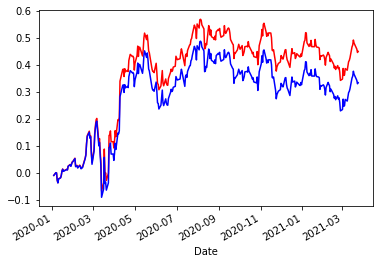

In [41]:
data['Return'].cumsum().plot(color='red')
data['Logreturn'].cumsum().plot(color='blue')

In [10]:
data.head()

,High,Low,Open,Close,Volume,Adj Close,SMA20
Date,,,,,,,
2020-01-02,43.880001,43.189999,43.549999,43.220001,6287500.0,42.054630,NaN
2020-01-03,44.040001,42.790001,43.750000,42.830002,9148900.0,41.675148,NaN
2020-01-06,43.849998,42.980000,43.759998,43.259998,10416400.0,42.093552,NaN
2020-01-07,43.520000,42.980000,43.160000,43.230000,9378300.0,42.064362,NaN
2020-01-08,43.389999,41.959999,43.259998,42.080002,9455300.0,40.945374,NaN


In [120]:
def ATR(data, period):
    for i in range(1, len(data)):
        d1 = data.loc[i, 'High'] - data.loc[i, 'Low']
        d2 = abs(data.loc[i, 'High'] - data.loc[i-1, 'Close'])
        d3 = abs(data.loc[i, 'Low'] - data.loc[i-1, 'Close'])
        data.loc[i, 'TR'] = max(d1, d2, d3).round(2)
    
    data['ATR'] =  data['TR'].rolling(period).mean()
    return data

In [164]:
ticker = 'GC=F'
#start_date = datetime(2020, 1, 1)
#end_date = datetime(2021, 3, 24)

start_date = '2020-01-01'
end_date = '2021-03-24'

data = web.get_data_yahoo(ticker, start=start_date, end=end_date, interval='d')
data = data.reset_index()


In [165]:
PERIOD_ATR = 14
PERIOD_Z = 30

data['SMA20'] = data['Adj Close'].rolling(20).mean()

ATR(data, PERIOD_ATR)

data['ATRSMA'] = data['ATR'].rolling(50).mean()
data['Z'] = (data['ATR'] - data['ATR'].rolling(PERIOD_Z).mean()) / data['ATR'].rolling(PERIOD_Z).std()
data['ZSMA'] = data['Z'].rolling(50).mean()
data = data.dropna()
data = data.reset_index(drop=True)

In [183]:
data.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,SMA20,TR,ATR,ATRSMA,Z,ZSMA
210,2021-03-18,1750.300049,1721.800049,1745.800049,1732.199951,138.0,1732.199951,1736.550000,28.5,22.242857,24.858714,-1.427008,0.169680
211,2021-03-19,1742.199951,1733.599976,1742.199951,1741.400024,13.0,1741.400024,1734.829999,10.0,21.050000,24.797429,-1.981825,0.135149
212,2021-03-22,1737.800049,1737.800049,1737.800049,1737.800049,51.0,1737.800049,1731.385004,3.6,19.564286,24.713714,-2.473052,0.092620
213,2021-03-23,1724.699951,1724.699951,1724.699951,1724.699951,6.0,1724.699951,1727.400000,13.1,18.385714,24.515000,-2.670568,0.012374
214,2021-03-24,1732.900024,1727.500000,1727.500000,1732.900024,26.0,1732.900024,1724.225000,8.2,17.742857,24.327714,-2.633487,-0.059117


In [184]:
start = data.loc[0, 'Date']
datetime.strftime(start, '%Y-%m-%d')

'2020-05-14'

In [191]:
data.loc[-1:]

,Date,High,Low,Open,Close,Volume,Adj Close,SMA20,TR,ATR,ATRSMA,Z,ZSMA
0,2020-05-14,1743.099976,1720.500000,1724.300049,1738.099976,672.0,1738.099976,1706.895001,29.2,21.692857,41.455286,-1.555240,0.180099
1,2020-05-15,1753.400024,1739.699951,1739.699951,1753.400024,719.0,1753.400024,1710.105005,15.3,21.357143,41.269857,-1.500062,0.096440
2,2020-05-18,1770.500000,1731.800049,1755.699951,1731.800049,229.0,1731.800049,1711.615009,38.7,23.442857,41.081714,-1.199249,0.020148
3,2020-05-19,1749.500000,1744.199951,1744.199951,1744.199951,167.0,1744.199951,1714.915009,17.7,23.885714,40.874714,-1.080567,-0.050223
4,2020-05-20,1752.099976,1745.599976,1751.599976,1750.599976,16.0,1750.599976,1716.010010,7.9,21.700000,40.594286,-1.225103,-0.120835
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,2021-03-18,1750.300049,1721.800049,1745.800049,1732.199951,138.0,1732.199951,1736.550000,28.5,22.242857,24.858714,-1.427008,0.169680
211,2021-03-19,1742.199951,1733.599976,1742.199951,1741.400024,13.0,1741.400024,1734.829999,10.0,21.050000,24.797429,-1.981825,0.135149
212,2021-03-22,1737.800049,1737.800049,1737.800049,1737.800049,51.0,1737.800049,1731.385004,3.6,19.564286,24.713714,-2.473052,0.092620
213,2021-03-23,1724.699951,1724.699951,1724.699951,1724.699951,6.0,1724.699951,1727.400000,13.1,18.385714,24.515000,-2.670568,0.012374


In [204]:
start = datetime.strftime(data.loc[0, 'Date'], '%Y-%m-%d')
start

'2020-05-14'

In [206]:
end = datetime.strftime(data.loc[len(data)-1, 'Date'], '%Y-%m-%d')
end

'2021-03-24'

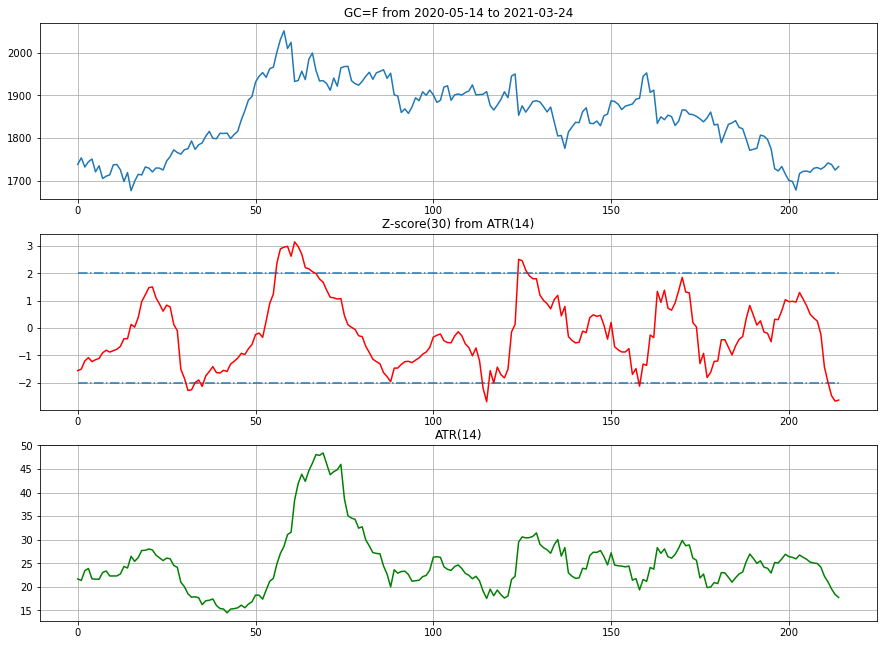

In [207]:
plt.figure(figsize=(15,11))

plt.subplot(3,1,1)
plt.plot(data.index, data['Adj Close'])
plt.title(f'{ticker} from {start} to {end}')
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(data.index, data['Z'], c='r')
#plt.plot(data.index, data['ZSMA'], '--', c='r')
plt.hlines(2, min(data.index), max(data.index), linestyles='dashdot')
plt.hlines(-2, min(data.index),  max(data.index), linestyles='dashdot')
plt.title(f'Z-score({PERIOD_Z}) from ATR({PERIOD_ATR})')
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(data.index, data['ATR'], c='g')
#plt.plot(data.index, data['ATRSMA'], '--', c='r')
plt.title(f'ATR({PERIOD_ATR})')
plt.grid(True)

In [130]:
1685/1400-1

0.20357142857142851